# 1. Load dataset

#### In this assignment, you are expected to practice building pipeline, doing k-fold cross validation and performing hyperparameter tuning.
#### You will be working with mobile phone dataset (mobile_train.csv).

In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [2]:
df = pd.read_csv("C:/Users/ACER/Downloads/mobile_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

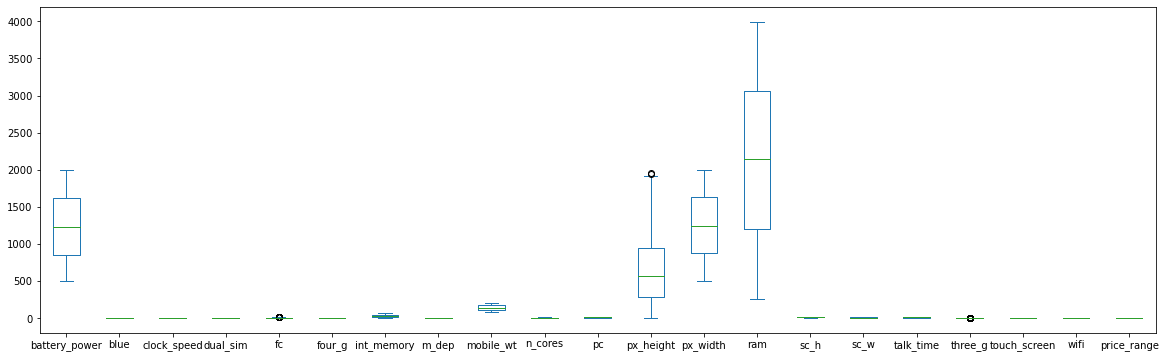

In [6]:
df.plot(kind="box",figsize=(20,6))

In [7]:
Q1 = df["fc"].quantile(q=0.25)
Q3 = df["fc"].quantile(q=0.75)
IQR = Q3-Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df["fc"] > ul) | (df["fc"] < ll)]

In [8]:
df.drop(df[(df.fc > ul) | (df.fc < ll) ].index , inplace=True)

In [9]:
Q1 = df["px_height"].quantile(q=0.25)
Q3 = df["px_height"].quantile(q=0.75)
IQR = Q3-Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df["px_height"] > ul) | (df["px_height"] < ll)]

In [10]:
df.drop(df[(df.px_height > ul) | (df.px_height < ll) ].index , inplace=True)

In [11]:
Q1 = df["three_g"].quantile(q=0.25)
Q3 = df["three_g"].quantile(q=0.75)
IQR = Q3-Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df["three_g"] > ul) | (df["three_g"] < ll)]
df.drop(df[(df.three_g > ul) | (df.three_g < ll) ].index , inplace=True)

In [12]:
df.shape

(1506, 21)

<AxesSubplot:>

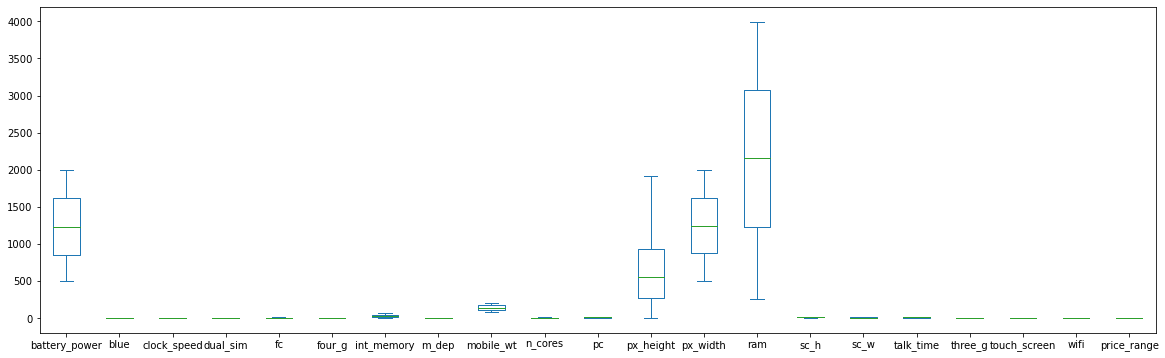

In [13]:
df.plot(kind="box",figsize=(20,6))

In [14]:
df["price_range"]

1       2
2       2
3       2
4       1
5       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1506, dtype: int64

In [15]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.008773,-0.004233,-0.060162,0.008872,0.013188,-0.003460,0.046109,-0.003431,-0.019718,...,0.001999,-0.015348,-0.001201,-0.022289,-0.013836,0.050343,NaN,-0.000995,-0.029398,0.198363
blue,-0.008773,1.000000,0.023868,0.008268,0.007671,0.042533,0.045125,0.010157,-0.008820,0.026366,...,-0.005624,-0.031530,0.022473,-0.000398,0.012280,0.010938,NaN,0.001662,0.005611,0.012853
clock_speed,-0.004233,0.023868,1.000000,-0.005561,-0.005252,-0.022168,0.006357,-0.006467,0.001881,0.008819,...,-0.034380,-0.035603,0.017788,-0.040479,0.019216,-0.001268,NaN,0.008640,-0.007846,-0.008426
dual_sim,-0.060162,0.008268,-0.005561,1.000000,-0.047572,0.014357,-0.019482,-0.031846,-0.019662,-0.017252,...,-0.019638,0.022427,0.029773,-0.010486,-0.013168,-0.029936,NaN,-0.018722,0.046373,0.002248
fc,0.008872,0.007671,-0.005252,-0.047572,1.000000,-0.024502,-0.041241,-0.016700,0.019940,-0.012578,...,-0.026090,-0.033701,0.027878,-0.003695,-0.010430,-0.003210,NaN,-0.014226,0.021441,0.027070
four_g,0.013188,0.042533,-0.022168,0.014357,-0.024502,1.000000,0.020596,0.007449,-0.026918,-0.032471,...,-0.001418,0.012519,-0.002570,0.027715,0.026561,-0.029138,NaN,0.015259,-0.031373,0.001439
int_memory,-0.003460,0.045125,0.006357,-0.019482,-0.041241,0.020596,1.000000,0.015116,-0.040348,-0.048364,...,0.006903,-0.016949,0.029208,0.050207,0.040585,-0.019374,NaN,-0.047263,0.010927,0.039853
m_dep,0.046109,0.010157,-0.006467,-0.031846,-0.016700,0.007449,0.015116,1.000000,0.015948,0.000406,...,0.033932,0.007167,0.008157,-0.025091,-0.027170,0.011087,NaN,-0.007385,-0.032769,0.017375
mobile_wt,-0.003431,-0.008820,0.001881,-0.019662,0.019940,-0.026918,-0.040348,0.015948,1.000000,-0.029157,...,0.024237,0.011310,0.005880,-0.044683,-0.016249,0.010561,NaN,-0.032637,-0.010552,-0.021242
n_cores,-0.019718,0.026366,0.008819,-0.017252,-0.012578,-0.032471,-0.048364,0.000406,-0.029157,1.000000,...,-0.007378,0.037408,0.004067,0.000995,0.035266,0.000595,NaN,0.039057,-0.010249,0.003618


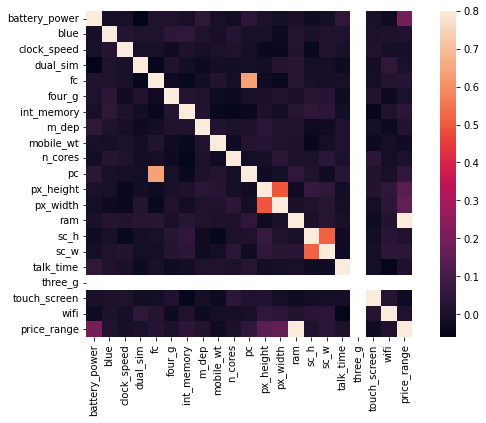

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), vmax=.8, square=True);

In [17]:
y_label = df.iloc[:,-1]
y_label

1       2
2       2
3       2
4       1
5       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1506, dtype: int64

In [18]:
x_features = df.drop("price_range",axis=1)
x_features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [19]:
# min-max scaling 
#df["px_height"] = (df["px_height"] - df["px_height"].min())/(df["px_height"].max()-df["px_height"].min())
#df["px_width"] = (df["px_width"] - df["px_width"].min())/(df["px_width"].max()-df["px_width"].min())
#df["ram"] = (df["ram"] - df["ram"].min())/(df["ram"].max()-df["ram"].min())

# 2. Tuning

#### Build a random forest classifier model and perform hyperparameter tuning using grid search. Also apply 5-fold cross validation while doing searching. Use following values for the search:
- n_estimators - 100, 200, 300
- max_depth - 3, 5
- criterion - gini, entropy

In [20]:
#from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_features, y_label, test_size= .25, random_state=1)

In [21]:
#X_train.shape

In [22]:
#X_test.shape

In [20]:
param_grid = {'max_depth': [3,5],'n_estimators': [100,200,300],'criterion':["gini",'entropy']}

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
model = RandomForestClassifier(random_state = 1)

In [22]:
g_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, return_train_score=True)
g_search.fit(x_features, y_label);
print(g_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 5, n_estimators=200, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[346  23   0   0]
 [ 43 287  44   0]
 [  0  76 260  47]
 [  0   0  21 359]]
0.8313413014608234


#### Get the best score and optimal values for hyperparameters.

In [ ]:
# {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}

#### Inspect the values and check if you can do better.

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 30, n_estimators=700, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 28 313  33   0]
 [  0  41 315  27]
 [  0   0  27 353]]
0.8837981407702523


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 25, n_estimators=600, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 31 310  33   0]
 [  0  41 316  26]
 [  0   0  27 353]]
0.8824701195219123


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 30, n_estimators=500, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[351  18   0   0]
 [ 30 311  33   0]
 [  0  40 314  29]
 [  0   0  26 354]]
0.8831341301460823


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 12, n_estimators=400, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 30 310  34   0]
 [  0  45 304  34]
 [  0   0  23 357]]
0.8771580345285525


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 15, n_estimators=400, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 32 309  33   0]
 [  0  41 315  27]
 [  0   0  25 355]]
0.8824701195219123


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 13, n_estimators=800, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 31 310  33   0]
 [  0  42 312  29]
 [  0   0  27 353]]
0.8798140770252324


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(max_depth = 13, n_estimators=800, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)
print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 31 310  33   0]
 [  0  42 312  29]
 [  0   0  27 353]]
0.8798140770252324


#### Perform hyperparameter tuning using random search. Increase number of iterations if needed. Do not forget about 5-fold validation.

In [25]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier(random_state = 1)
max_depth = [x for x in range(3,10)]
n_estimators = [i for i in range(100,800,50)] 
criterion = ["entropy","gini"]
random_grid = {"max_depth":max_depth,"n_estimators":n_estimators,"criterion":criterion}

In [100]:
rfr_random = RandomizedSearchCV(estimator = model, param_distributions=random_grid, n_iter = 25, cv = 5, return_train_score=True)

In [102]:
rfr_random.fit(x_features, y_label)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=25,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750]},
                   return_train_score=True)

In [103]:
print(rfr_random.best_params_)

{'n_estimators': 650, 'max_depth': 9, 'criterion': 'entropy'}


In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 9, n_estimators=650, criterion = "entropy",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[350  19   0   0]
 [ 30 310  34   0]
 [  0  50 300  33]
 [  0   0  26 354]]
0.8725099601593626


In [106]:
# change number of iters 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 1)
max_depth = [x for x in range(3,10)]
n_estimators = [i for i in range(100,800,50)] 
criterion = ["entropy","gini"]
random_grid = {"max_depth":max_depth,"n_estimators":n_estimators,"criterion":criterion}
rfr_random = RandomizedSearchCV(estimator = model, param_distributions=random_grid, n_iter = 15, cv = 5, return_train_score=True)
rfr_random.fit(x_features, y_label)
print(rfr_random.best_params_)

{'n_estimators': 150, 'max_depth': 9, 'criterion': 'gini'}


In [107]:
classifier = RandomForestClassifier(max_depth = 9, n_estimators=150, criterion = "gini",random_state=1)
classifier.fit(x_features, y_label)
y_pred = cross_val_predict(classifier, x_features, y_label, cv=5)

print(confusion_matrix(y_label,y_pred))
print(accuracy_score(y_label, y_pred))

[[348  21   0   0]
 [ 35 305  34   0]
 [  0  37 314  32]
 [  0   0  36 344]]
0.8705179282868526


#### Create a pipeline and add standard scaling and dimensionality reduction. You can use StandardScaler and PCA. Perform tuning by random search. Now you have to provide values for hyperparameters of different components of your pipeline. Find out how you can achieve that. For PCA, one hyperparameter to tune would be number of components. Try to isolate and check the effect of scaling and dimensionality reduction on the model.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('reduce_dimension', PCA()),('model',RandomForestClassifier())])

In [36]:
pipeline.fit(x_features, y_label)

Pipeline(steps=[('scaler', StandardScaler()), ('reduce_dimension', PCA()),
                ('model', RandomForestClassifier())])

In [37]:
pipeline.score(x_features, y_label) 

1.0

In [38]:
parameters = {'model__n_estimators':[i for i in range(50,800,20)],'model__max_depth': [x for x in range(3,20)],'model__criterion':["entropy","gini"]}

In [39]:
random_grid = RandomizedSearchCV(pipeline,parameters,n_iter = 15, cv=5,random_state=1)
random_grid

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('reduce_dimension', PCA()),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=15,
                   param_distributions={'model__criterion': ['entropy', 'gini'],
                                        'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14, 15, 16, 17, 18,
                                                             19],
                                        'model__n_estimators': [50, 70, 90, 110,
                                                                130, 150, 170,
                                                                190, 210, 230,
                                                                250, 270, 290,
                                                                310, 330, 350,
                                                                370, 390, 410,
                                                                430, 450, 470,
                                                                490, 510, 530,
                                                                550, 570, 590,
                                                                610, 630, ...]},
                   random_state=1)

In [40]:
result = random_grid.fit(x_features, y_label)

In [41]:
result

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('reduce_dimension', PCA()),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=15,
                   param_distributions={'model__criterion': ['entropy', 'gini'],
                                        'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14, 15, 16, 17, 18,
                                                             19],
                                        'model__n_estimators': [50, 70, 90, 110,
                                                                130, 150, 170,
                                                                190, 210, 230,
                                                                250, 270, 290,
                                                                310, 330, 350,
                                                                370, 390, 410,
                                                                430, 450, 470,
                                                                490, 510, 530,
                                                                550, 570, 590,
                                                                610, 630, ...]},
                   random_state=1)

In [42]:
y_pred = cross_val_predict(result, x_features, y_label, cv=5)

In [2]:
#y_pred

In [43]:
accuracy_score(y_label,y_pred)

0.650066401062417